<div class="alert alert-block alert-info"><font size="6"><b>Sprint 5 Task 1 (S05_T01)</b></font><h6 align="right"><u>Author: Alberto Achaval</u></h6></div>

## <SPAN style=color:#1F618D>Level 1</SPAN>

### <SPAN style=color:#1F618D>Practice 1</SPAN>

<SPAN style=color:#1F618D>Grab a sports-themed dataset you like. Performs data sampling by generating a simple random sample and a systematic sample.</SPAN>

To solve this practice we start by **importing** all the required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice, dropwhile

For this practice, we are going to use data from the ATP (Association of Professional Tennis) matches from the year 2018. In this data set, the winner and loser are coded with an ID. We have another dataset that references this ID with player information.

For the matches dataset we have the following column reference:
* ace = absolute number of aces  
* df = number of double faults  
* svpt = total serve points  
* 1stin = 1st serve in  
* 1stwon = points won on 1st serve  
* 2ndwon = points won on 2nd serve  
* SvGms = serve games  
* bpSaved = break point saved  
* bpFaced = break point faced  

source: https://www.kaggle.com/datasets/pablodroca/atp-tennis-matches-20002019?select=atp_matches_2019.csv

In [2]:
ranking = pd.read_csv('atp_matches_2018.csv') # matches 2018
players = pd.read_csv('atp_players.csv') # players information

In [3]:
pd.set_option('display.max_columns', 50)
ranking.head(3)

,tourney_id,tourney_name,tourney_date,surface,winner_id,loser_id,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2018-M020,Brisbane,20180101,Hard,105992,104919,6-4 3-6 6-2,3,R32,123.0,9.0,2.0,82.0,49.0,39.0,20.0,13.0,8.0,9.0,10.0,3.0,80.0,47.0,33.0,19.0,14.0,1.0,4.0,47.0,1010.0,52.0,909.0
1,2018-M020,Brisbane,20180101,Hard,111577,111442,6-2 6-4,3,R32,90.0,5.0,3.0,58.0,32.0,25.0,14.0,9.0,4.0,5.0,3.0,5.0,62.0,41.0,25.0,7.0,9.0,7.0,11.0,54.0,890.0,94.0,593.0
2,2018-M020,Brisbane,20180101,Hard,104797,106000,6-7(4) 6-3 6-2,3,R32,145.0,7.0,0.0,94.0,66.0,48.0,12.0,14.0,9.0,11.0,8.0,6.0,120.0,53.0,37.0,29.0,15.0,10.0,16.0,63.0,809.0,30.0,1391.0


In [4]:
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          2889 non-null   object 
 1   tourney_name        2889 non-null   object 
 2   tourney_date        2889 non-null   int64  
 3   surface             2889 non-null   object 
 4   winner_id           2889 non-null   int64  
 5   loser_id            2889 non-null   int64  
 6   score               2889 non-null   object 
 7   best_of             2889 non-null   int64  
 8   round               2889 non-null   object 
 9   minutes             2854 non-null   float64
 10  w_ace               2863 non-null   float64
 11  w_df                2863 non-null   float64
 12  w_svpt              2863 non-null   float64
 13  w_1stIn             2863 non-null   float64
 14  w_1stWon            2863 non-null   float64
 15  w_2ndWon            2863 non-null   float64
 16  w_SvGm

In [5]:
players.head()

,player_id,name_first,name_list,hand,birthdate,country
0,100001,Gardnar,Mulloy,R,19131122.0,USA
1,100002,Pancho,Segura,R,19210620.0,ECU
2,100003,Frank,Sedgman,R,19271002.0,AUS
3,100004,Giuseppe,Merlo,R,19271011.0,ITA
4,100005,Richard Pancho,Gonzales,R,19280509.0,USA


In [6]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54067 entries, 0 to 54066
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   player_id   54067 non-null  int64  
 1   name_first  53890 non-null  object 
 2   name_list   54025 non-null  object 
 3   hand        48289 non-null  object 
 4   birthdate   43099 non-null  float64
 5   country     54067 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.5+ MB


I want to merge both dataframes in order to replace in **matches** the **winner_id** and **loser_id** with actual name and contry from **players**.

In [7]:
# new column for players with joined name

players['player'] =  players ['name_list'] + ', ' + players['name_first']

In [8]:
# merge dataframes, first winner and then loser

winners = pd.merge(ranking, players.loc[:, ['player_id', 'country', 'player']], 
                 left_on=['winner_id'], right_on=['player_id']).drop(columns = ['winner_id', 'player_id'])

atp_2018 = pd.merge(winners, players.loc[:, ['player_id', 'country', 'player']], how= 'inner', 
                  left_on=['loser_id'], right_on=['player_id']).drop(columns = ['loser_id', 'player_id'])

In [9]:
# reorder and rename columns

atp_2018 = atp_2018[['tourney_id', 'tourney_name', 'tourney_date', 'surface', 'player_x', 'country_x',  'player_y', 
                 'country_y', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 
                 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 
                 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank', 'winner_rank_points', 
                 'loser_rank', 'loser_rank_points']]

atp_2018.rename(columns={'player_x': 'winner', 'country_x': 'country_winner', 
                       'player_y': 'loser', 'country_y': 'country_loser' }, inplace=True)

In [10]:
atp_2018.head()

,tourney_id,tourney_name,tourney_date,surface,winner,country_winner,loser,country_loser,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2018-M020,Brisbane,20180101,Hard,"Harrison, Ryan",USA,"Mayer, Leonardo",ARG,6-4 3-6 6-2,3,R32,123.0,9.0,2.0,82.0,49.0,39.0,20.0,13.0,8.0,9.0,10.0,3.0,80.0,47.0,33.0,19.0,14.0,1.0,4.0,47.0,1010.0,52.0,909.0
1,2018-6242,Winston Salem,20180820,Hard,"Edmund, Kyle",GBR,"Mayer, Leonardo",ARG,6-3 6-3,3,R32,72.0,3.0,3.0,47.0,29.0,27.0,10.0,9.0,0.0,0.0,7.0,5.0,54.0,31.0,24.0,8.0,9.0,2.0,5.0,16.0,1985.0,41.0,1061.0
2,2018-M016,Eastbourne,20180625,Grass,"Millman, John",AUS,"Mayer, Leonardo",ARG,7-6(7) 7-6(4),3,R16,121.0,3.0,1.0,83.0,58.0,39.0,16.0,12.0,6.0,8.0,5.0,2.0,93.0,53.0,39.0,18.0,12.0,5.0,7.0,62.0,906.0,36.0,1227.0
3,2018-M007,Miami Masters,20180319,Hard,"Coric, Borna",CRO,"Mayer, Leonardo",ARG,6-7(5) 6-3 6-4,3,R64,176.0,5.0,4.0,112.0,70.0,56.0,20.0,16.0,8.0,9.0,10.0,8.0,107.0,54.0,42.0,25.0,15.0,4.0,7.0,36.0,1366.0,45.0,1080.0
4,2018-0414,Hamburg,20180723,Clay,"Basilashvili, Nikoloz",RUS,"Mayer, Leonardo",ARG,6-4 0-6 7-5,3,F,132.0,4.0,8.0,90.0,42.0,33.0,23.0,14.0,6.0,9.0,9.0,4.0,87.0,57.0,45.0,12.0,14.0,2.0,4.0,81.0,715.0,36.0,1197.0


In [11]:
atp_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2889 entries, 0 to 2888
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          2889 non-null   object 
 1   tourney_name        2889 non-null   object 
 2   tourney_date        2889 non-null   int64  
 3   surface             2889 non-null   object 
 4   winner              2889 non-null   object 
 5   country_winner      2889 non-null   object 
 6   loser               2889 non-null   object 
 7   country_loser       2889 non-null   object 
 8   score               2889 non-null   object 
 9   best_of             2889 non-null   int64  
 10  round               2889 non-null   object 
 11  minutes             2854 non-null   float64
 12  w_ace               2863 non-null   float64
 13  w_df                2863 non-null   float64
 14  w_svpt              2863 non-null   float64
 15  w_1stIn             2863 non-null   float64
 16  w_1stW

Now we have the dataframe as we wanted it. Let's do the sampling and study for example the **surface** distribution during 2018. It could be **hard, clay or grass**.

First of all, we are going to take a **simple random sample**.

**Simple random sampling** is a type of probability sampling in which the researcher randomly selects a subset of participants from a population. Each member of the population has an equal chance of being selected. Data is then collected from as large a percentage as possible of this random subset.

**Sample size**: If you take a population sample, you must use a formula to figure out what sample size you need to take. Sometimes you know something about a population, which can help you determine a sample size. For example, it’s well known that IQ scores follow a normal distribution pattern. But what about if you know nothing about your population at all? That’s when you can use Slovin’s formula to figure out what sample size you need to take, which is written as

<h2 align="center">n = N / (1 + Ne2)</h2>

Where:

n = Number of samples,  
N = Total population and  
e = Error tolerance (level).

In [12]:
# Sample size

N = len(atp_2018)
e = 0.05

n = round(N/(1 + N*e**2))
n

351

In [13]:
simplers = atp_2018.sample(n = n, random_state = 7)
simplers

,tourney_id,tourney_name,tourney_date,surface,winner,country_winner,loser,country_loser,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
2864,2018-0360,Marrakech,20180409,Clay,"Andujar, Pablo",ESP,"Arnaboldi, Andrea",ITA,6-0 6-2,3,R16,69.0,1.0,0.0,39.0,30.0,22.0,8.0,7.0,0.0,0.0,1.0,1.0,56.0,35.0,18.0,7.0,7.0,2.0,7.0,355.0,126.0,221.0,246.0
2851,2018-0506,Buenos Aires,20180212,Clay,"Bellucci, Thomaz",BRA,"Cachin, Pedro",ARG,6-2 6-1,3,R32,57.0,0.0,1.0,40.0,24.0,19.0,10.0,7.0,0.0,0.0,0.0,4.0,43.0,27.0,13.0,4.0,8.0,1.0,6.0,137.0,431.0,276.0,183.0
1042,2018-0424,New York,20180212,Hard,"Gojowczyk, Peter",GER,"Kavcic, Blaz",SLO,6-4 6-2,3,R32,79.0,6.0,0.0,51.0,37.0,28.0,11.0,9.0,0.0,0.0,3.0,2.0,80.0,45.0,28.0,16.0,9.0,9.0,12.0,63.0,816.0,108.0,526.0
897,2018-580,Australian Open,20180115,Hard,"Dimitrov, Grigor",BUL,"Rublev, Andrey",RUS,6-3 4-6 6-4 6-4,5,R32,184.0,13.0,15.0,142.0,89.0,68.0,20.0,20.0,11.0,15.0,4.0,13.0,136.0,84.0,56.0,23.0,19.0,13.0,19.0,3.0,4990.0,32.0,1373.0
1209,2018-M007,Miami Masters,20180319,Hard,"Shapovalov, Denis",CAN,"Troicki, Viktor",SRB,6-3 6-7(4) 7-6(6),3,R128,146.0,7.0,9.0,124.0,73.0,52.0,27.0,17.0,11.0,14.0,2.0,3.0,93.0,51.0,36.0,23.0,16.0,3.0,7.0,46.0,1076.0,68.0,790.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,2018-540,Wimbledon,20180702,Grass,"Raonic, Milos",CAN,"Millman, John",AUS,7-6(4) 7-6(4) 7-6(4),5,R64,158.0,34.0,5.0,115.0,80.0,68.0,19.0,19.0,1.0,2.0,3.0,1.0,121.0,82.0,59.0,25.0,20.0,3.0,4.0,32.0,1430.0,56.0,931.0
2114,2018-M035,Washington,20180730,Hard,"Young, Donald",USA,"Wawrinka, Stanislas",SUI,6-4 6-7(5) 7-6(3),3,R64,141.0,6.0,5.0,106.0,70.0,55.0,22.0,17.0,2.0,2.0,11.0,5.0,98.0,60.0,48.0,24.0,17.0,0.0,1.0,234.0,242.0,198.0,290.0
1521,2018-0439,Umag,20180716,Clay,"Pella, Guido",ARG,"Lajovic, Dusan",SRB,7-6(3) 7-5,3,QF,101.0,2.0,1.0,73.0,45.0,32.0,20.0,12.0,1.0,2.0,4.0,5.0,77.0,43.0,30.0,18.0,12.0,5.0,7.0,72.0,780.0,66.0,825.0
179,2018-7650,Antalya,20180625,Grass,"Monfils, Gael",FRA,"Garcia Lopez, Guillermo",ESP,7-6(3) 6-4,3,QF,77.0,12.0,0.0,59.0,46.0,42.0,8.0,11.0,1.0,1.0,3.0,5.0,74.0,48.0,33.0,15.0,11.0,1.0,2.0,41.0,1130.0,69.0,834.0


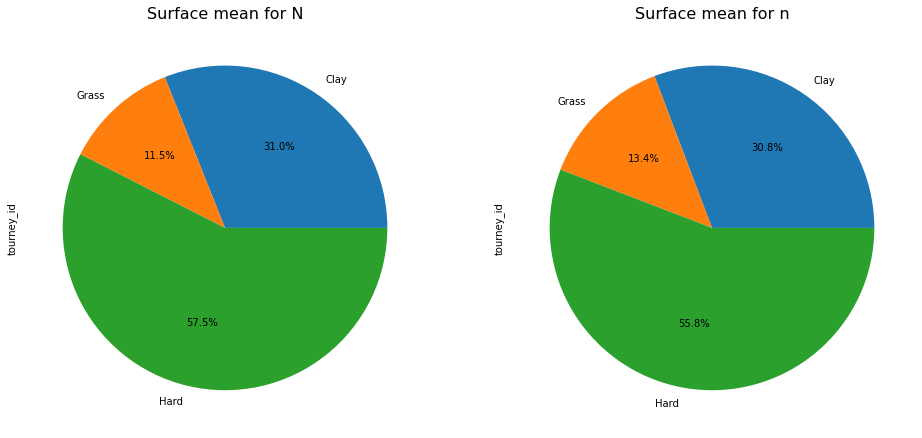

In [14]:
# Prepare data

# Create plot
fig, (ax1, ax2) = plt.subplots(figsize = (16, 8), nrows = 1, ncols = 2) # One figure with 2 subplots
simplers.groupby('surface')['tourney_id'].count().plot.pie(subplots=True, autopct='%1.1f%%')
plt.subplot (1,2,1)

atp_2018.groupby('surface')['tourney_id'].count().plot.pie(subplots=True, autopct='%1.1f%%')
plt.subplot (1,2,2)

# Style and customize plot
plt.style.use('Solarize_Light2')
ax1.set_title('Surface mean for N')
ax2.set_title('Surface mean for n')

# Show and save plot
plt.show()
# fig.savefig('xxx', dpi = 300, bbox_inches = 'tight')

Now we are going to take a **systematic random sample**.

**Systematic random sampling** is a probability sampling method in which a random sample, with a fixed periodic interval, is selected from a larger population. The fixed periodic interval, called the sampling interval, is calculated by dividing the population size by the desired sample size.

<h2 align="center">i = N / n</h2>

Where:  
i = interval  
n = Number of samples,    
N = Total population and    

In [15]:
# interval 
i = round(N / n)
i

8

In [16]:
def systematic_sample(df, interval):
    first = df.sample(n = 1, random_state = 7) # first row is random in this case
    f = first.index[0]
    cycling = cycle(np.arange(0,len(atp_2018), step = interval)) # cycle thorugh the list by step
    skipping = dropwhile(lambda x: x != f, cycling) # drop the values until x==f 
    slicing = islice(skipping, None, n) # take the first n values
    indexes = list(slicing) # create a list from iterator
    sys_sample = df.iloc[indexes]
    return sys_sample

systematicsr = systematic_sample(atp_2018, i)
systematicsr

,tourney_id,tourney_name,tourney_date,surface,winner,country_winner,loser,country_loser,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
2864,2018-0360,Marrakech,20180409,Clay,"Andujar, Pablo",ESP,"Arnaboldi, Andrea",ITA,6-0 6-2,3,R16,69.0,1.0,0.0,39.0,30.0,22.0,8.0,7.0,0.0,0.0,1.0,1.0,56.0,35.0,18.0,7.0,7.0,2.0,7.0,355.0,126.0,221.0,246.0
2872,2018-M-DC-2018-G2-EPA-M-EGY-DEN-01,Davis Cup G2 R2: EGY vs DEN,20180407,Hard,"Rune, Holger Vitus Nodskov",DEN,"Hossam, Youssef",EGY,6-2 7-6(14),3,RR,84.0,5.0,2.0,70.0,40.0,30.0,18.0,10.0,2.0,4.0,0.0,3.0,74.0,44.0,29.0,14.0,10.0,2.0,6.0,NaN,NaN,311.0,157.0
2880,2018-6242,Winston Salem,20180820,Hard,"Munar, Jaume",ESP,"Schnur, Brayden",CAN,7-6(5) 7-6(1),3,R64,112.0,3.0,4.0,83.0,51.0,35.0,17.0,12.0,1.0,4.0,7.0,6.0,83.0,51.0,37.0,11.0,12.0,3.0,6.0,85.0,656.0,263.0,207.0
2888,2018-M-DC-2018-WG-PO-SUI-SWE-01,Davis Cup WG PO: SUI vs SWE,20180914,Hard,"Mridha, Jonathan",SWE,"Ehrat, Sandro",SUI,4-6 6-3 6-4 7-6(4),5,RR,167.0,10.0,6.0,122.0,74.0,59.0,31.0,21.0,1.0,2.0,4.0,0.0,125.0,72.0,55.0,30.0,20.0,5.0,7.0,1094.0,8.0,1211.0,5.0
0,2018-M020,Brisbane,20180101,Hard,"Harrison, Ryan",USA,"Mayer, Leonardo",ARG,6-4 3-6 6-2,3,R32,123.0,9.0,2.0,82.0,49.0,39.0,20.0,13.0,8.0,9.0,10.0,3.0,80.0,47.0,33.0,19.0,14.0,1.0,4.0,47.0,1010.0,52.0,909.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,2018-M-DC-2018-WG-M-GBR-ESP-01,Davis Cup WG R1: GBR vs ESP,20180202,Clay,"Ramos, Albert",ESP,"Broady, Liam",GBR,6-3 6-4 7-6(6),5,RR,154.0,3.0,2.0,101.0,66.0,44.0,20.0,16.0,7.0,10.0,3.0,3.0,105.0,63.0,37.0,21.0,15.0,8.0,14.0,21.0,1925.0,165.0,330.0
2744,2018-7161,Quito,20180205,Clay,"Carballes Baena, Roberto",ESP,"Gaio, Federico",ITA,7-6(5) 6-3,3,R32,109.0,2.0,4.0,66.0,38.0,28.0,17.0,10.0,2.0,3.0,2.0,7.0,76.0,42.0,30.0,16.0,11.0,8.0,11.0,107.0,523.0,247.0,211.0
2752,2018-0319,Kitzbuhel,20180730,Clay,"Novak, Dennis",AUT,"Rodionov, Jurij",AUT,6-4 0-6 6-1,3,R32,100.0,4.0,3.0,83.0,50.0,33.0,13.0,11.0,7.0,11.0,5.0,2.0,78.0,41.0,24.0,18.0,12.0,3.0,8.0,136.0,423.0,268.0,199.0
2760,2018-M-DC-2018-G1-AO-M-KOR-PAK-01,Davis Cup G1 R1: KOR vs PAK,20180202,Grass,"Khan, Aqeel",PAK,"Hong, Seong Chan",KOR,4-6 7-5 7-5,3,RR,162.0,4.0,3.0,116.0,54.0,39.0,32.0,17.0,8.0,11.0,7.0,6.0,100.0,59.0,44.0,21.0,17.0,7.0,11.0,1753.0,1.0,776.0,23.0


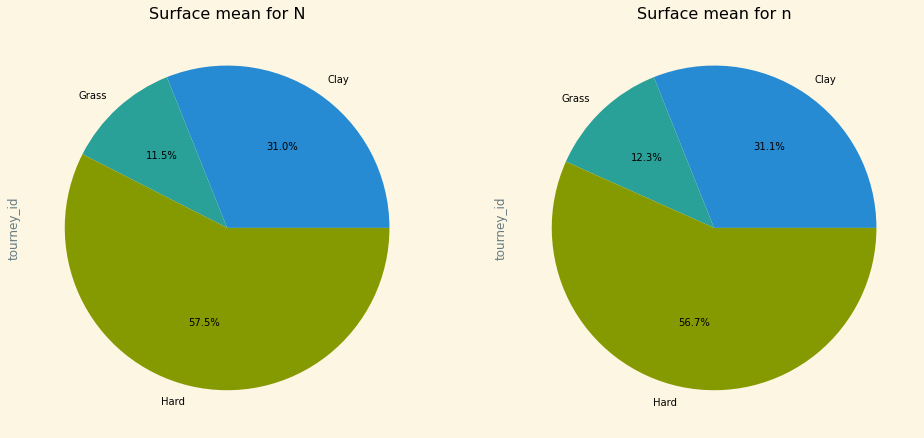

In [41]:
# Prepare data

# Create plot
fig, (ax1, ax2) = plt.subplots(figsize = (16, 8), nrows = 1, ncols = 2) # One figure with 2 subplots
systematicsr.groupby('surface')['tourney_id'].count().plot.pie(subplots = True, autopct = '%1.1f%%')
plt.subplot (1,2,1)

atp_2018.groupby('surface')['tourney_id'].count().plot.pie(subplots = True, autopct = '%1.1f%%')
plt.subplot (1,2,2)

# Style and customize plot
plt.style.use('Solarize_Light2')
ax1.set_title('Surface mean for N')
ax2.set_title('Surface mean for n')

# Show and save plot
plt.show()
# fig.savefig('xxx', dpi = 300, bbox_inches = 'tight')

## <SPAN style=color:#1F618D>Level 2</SPAN>

### <SPAN style=color:#1F618D>Practice 2</SPAN>

<SPAN style=color:#1F618D>Continue with the sports theme dataset and generate a **stratified sample** and a sample using **SMOTE** (Synthetic Minority Oversampling Technique).</SPAN>

Let's take a **Stratified random sample**. In this case we will use a proportioned sample.

In a proportionate stratified method, the sample size of each stratum is proportionate to the population size of the stratum. In a disproportional stratified sample, the size of each stratum is not proportional to its size in the population. 

**Stratified random sampling** is a method of sampling that involves the division of a population into smaller sub-groups known as strata. In stratified random sampling, or stratification, the strata are formed based on members' shared attributes or characteristics such as income or educational attainment.


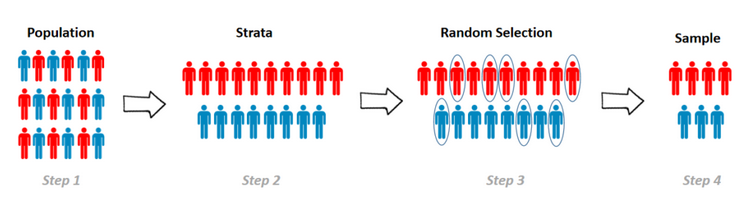



In [18]:
# frac = fraction of axis items to return (proportioned sample)
stratified_sample = atp_2018.sort_values(by = 'tourney_name').groupby('tourney_name', 
                                            group_keys = False).apply(lambda x: x.sample(frac = 0.126))

stratified_sample

,tourney_id,tourney_name,tourney_date,surface,winner,country_winner,loser,country_loser,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
422,2018-M004,Acapulco,20180226,Hard,"Donaldson, Jared",USA,"Lopez, Feliciano",ESP,6-3 6-1,3,QF,53.0,9.0,0.0,34.0,20.0,20.0,12.0,8.0,0.0,0.0,5.0,2.0,50.0,26.0,17.0,9.0,8.0,1.0,5.0,59.0,878.0,38.0,1295.0
1650,2018-M004,Acapulco,20180226,Hard,"Del Potro, Juan Martin",ARG,"Anderson, Kevin",RSA,6-4 6-4,3,F,100.0,12.0,4.0,58.0,36.0,28.0,14.0,10.0,0.0,0.0,11.0,0.0,60.0,34.0,27.0,11.0,10.0,1.0,3.0,9.0,2745.0,8.0,2825.0
302,2018-M004,Acapulco,20180226,Hard,"Zverev, Alexander",GER,"Mcdonald, Mackenzie",USA,6-3 7-5,3,R32,80.0,7.0,0.0,63.0,40.0,31.0,16.0,11.0,1.0,1.0,1.0,6.0,69.0,36.0,27.0,14.0,10.0,8.0,10.0,5.0,4450.0,140.0,392.0
372,2018-M004,Acapulco,20180226,Hard,"Donaldson, Jared",USA,"Basilashvili, Nikoloz",RUS,6-2 3-2 RET,3,R32,49.0,5.0,4.0,31.0,18.0,16.0,6.0,6.0,0.0,1.0,0.0,3.0,50.0,26.0,13.0,10.0,7.0,5.0,9.0,59.0,878.0,84.0,666.0
2178,2018-7650,Antalya,20180625,Grass,"Sugita, Yuichi",JPN,"Pella, Guido",ARG,6-4 3-6 6-4,3,R32,122.0,7.0,2.0,98.0,58.0,48.0,16.0,14.0,9.0,10.0,13.0,1.0,85.0,58.0,45.0,14.0,15.0,1.0,3.0,45.0,1050.0,72.0,770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,2018-6242,Winston Salem,20180820,Hard,"Gojowczyk, Peter",GER,"Zeballos, Horacio",ARG,6-4 6-7(4) 6-1,3,R32,107.0,18.0,6.0,100.0,52.0,40.0,25.0,15.0,3.0,5.0,7.0,4.0,94.0,54.0,34.0,18.0,14.0,5.0,10.0,45.0,1038.0,149.0,388.0
646,2018-6242,Winston Salem,20180820,Hard,"Jarry, Nicolas",CHI,"Seppi, Andreas",ITA,6-4 6-3,3,R32,66.0,8.0,0.0,51.0,27.0,23.0,14.0,9.0,0.0,1.0,6.0,3.0,59.0,30.0,24.0,10.0,10.0,3.0,7.0,47.0,1024.0,50.0,996.0
813,2018-6242,Winston Salem,20180820,Hard,"Jarry, Nicolas",CHI,"Struff, Jan Lennard",GER,6-2 6-2,3,R16,55.0,6.0,3.0,51.0,30.0,25.0,11.0,8.0,3.0,3.0,3.0,8.0,51.0,24.0,15.0,11.0,8.0,3.0,7.0,47.0,1024.0,52.0,975.0
174,2018-6242,Winston Salem,20180820,Hard,"Chung, Hyeon",KOR,"Garcia Lopez, Guillermo",ESP,7-6(4) 6-2,3,R32,106.0,4.0,5.0,68.0,35.0,27.0,16.0,10.0,2.0,4.0,6.0,3.0,71.0,45.0,28.0,12.0,10.0,2.0,6.0,23.0,1630.0,69.0,815.0


There are 357 rows compared to 351 in the previous practice. This should be for all rounding since we need whole numbers for each sample.
Let's check if we got a proportionate size from each sample of strata.

In [19]:
stratified_sample.groupby('tourney_name').tourney_id.value_counts()

tourney_name   tourney_id
Acapulco       2018-M004      4
Antalya        2018-7650      3
Antwerp        2018-7485      3
Atlanta        2018-6116      3
Auckland       2018-0301      3
                             ..
Us Open        2018-560      16
Vienna         2018-0337      4
Washington     2018-M035      6
Wimbledon      2018-540      16
Winston Salem  2018-6242      6
Name: tourney_id, Length: 103, dtype: int64

In [20]:
atp_2018.groupby('tourney_name').tourney_id.value_counts()

tourney_name   tourney_id
Acapulco       2018-M004      31
Antalya        2018-7650      27
Antwerp        2018-7485      27
Atlanta        2018-6116      27
Auckland       2018-0301      27
                            ... 
Us Open        2018-560      127
Vienna         2018-0337      31
Washington     2018-M035      47
Wimbledon      2018-540      127
Winston Salem  2018-6242      47
Name: tourney_id, Length: 135, dtype: int64

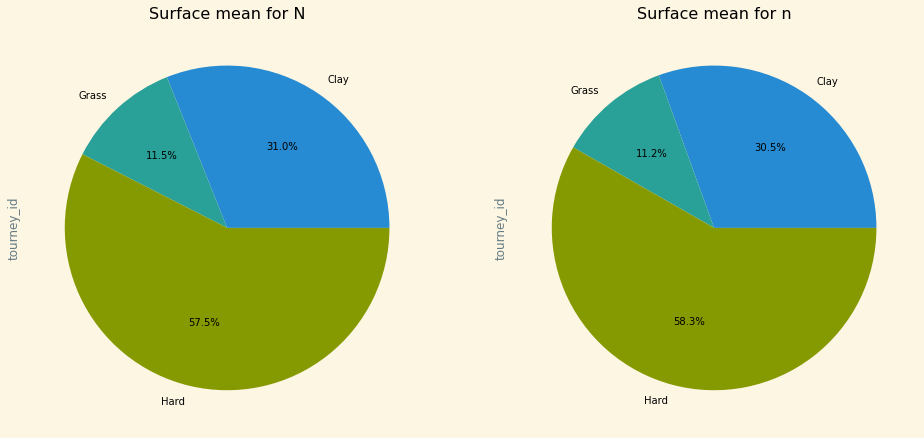

In [21]:
# Prepare data

# Create plot
fig, (ax1, ax2) = plt.subplots(figsize = (16, 8), nrows = 1, ncols = 2) # One figure with 2 subplots
stratified_sample.groupby('surface')['tourney_id'].count().plot.pie(subplots=True, autopct='%1.1f%%')
plt.subplot (1,2,1)

atp_2018.groupby('surface')['tourney_id'].count().plot.pie(subplots=True, autopct='%1.1f%%')
plt.subplot (1,2,2)

# Style and customize plot
plt.style.use('Solarize_Light2')
ax1.set_title('Surface mean for N')
ax2.set_title('Surface mean for n')

# Show and save plot
plt.show()
# fig.savefig('xxx', dpi = 300, bbox_inches = 'tight')

Now let's do the **SMOTE** (Synthetic Minority Oversampling Technique).  

**SMOTE** is an oversampling technique that generates synthetic samples from the minority class. It is used to obtain a synthetically class-balanced or nearly class-balanced training set, which is then used to train the classifier.

We start by importing the library that will help us to do the SMOTE. Imbalanced-learn (imported as imblearn) is an open source, MIT-licensed library relying on scikit-learn (imported as sklearn) and provides tools when dealing with classification with imbalanced classes.

In [22]:
from imblearn.over_sampling import SMOTE
from collections import Counter

We have **atp_2018** dataframe from before. Let's check for an imbalanced class to aply the SMOTE technique.

In [23]:
atp_2018.sample(5) # use sample() to see some random rows and not head() or tail() which might be skewed or biased

,tourney_id,tourney_name,tourney_date,surface,winner,country_winner,loser,country_loser,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
2055,2018-0451,Doha,20180101,Hard,"Coric, Borna",CRO,"Carreno Busta, Pablo",ESP,5-7 6-2 7-6(8),3,R32,161.0,13.0,4.0,115.0,80.0,56.0,15.0,16.0,7.0,11.0,3.0,2.0,110.0,73.0,45.0,19.0,16.0,6.0,11.0,48.0,1001.0,10.0,2615.0
2142,2018-0499,Delray Beach,20180219,Hard,"Del Potro, Juan Martin",ARG,"Chardy, Jeremy",FRA,6-2 6-4,3,R32,67.0,7.0,0.0,50.0,38.0,30.0,5.0,9.0,3.0,4.0,5.0,3.0,47.0,30.0,21.0,6.0,9.0,1.0,5.0,10.0,2815.0,96.0,580.0
978,2018-0341,Metz,20180917,Hard,"Bachinger, Matthias",GER,"Munar, Jaume",ESP,6-4 6-4,3,R32,83.0,6.0,0.0,79.0,54.0,37.0,14.0,10.0,10.0,11.0,6.0,2.0,63.0,43.0,32.0,8.0,10.0,4.0,7.0,166.0,340.0,82.0,698.0
2633,2018-0891,Pune,20180101,Hard,"Bhambri, Yuki",IND,"Kadhe, Arjun",IND,6-3 6-4,3,R32,75.0,2.0,0.0,48.0,34.0,22.0,10.0,9.0,0.0,2.0,5.0,5.0,66.0,41.0,25.0,8.0,10.0,4.0,9.0,118.0,499.0,610.0,45.0
216,2018-M021,Madrid Masters,20180507,Clay,"Kohlschreiber, Philipp",GER,"Sugita, Yuichi",JPN,6-4 6-3,3,R64,68.0,4.0,0.0,40.0,29.0,25.0,11.0,9.0,0.0,0.0,2.0,3.0,65.0,38.0,29.0,11.0,10.0,8.0,11.0,28.0,1450.0,46.0,1070.0


In [24]:
atp_2018.describe().round(2)

,tourney_date,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,2889.00,2889.00,2854.00,2863.00,2863.00,2863.00,2863.00,2863.00,2863.00,2863.00,2863.00,2863.00,2863.00,2863.00,2863.00,2863.00,2863.00,2863.00,2863.00,2863.00,2863.00,2882.00,2882.00,2858.00,2858.00
mean,20180551.04,3.39,110.65,7.49,2.83,79.85,49.53,37.75,16.78,12.88,3.45,4.99,5.71,3.51,83.04,50.21,34.00,15.26,12.64,4.79,8.50,82.61,1658.57,113.14,1073.08
std,294.99,0.79,42.11,5.99,2.38,29.40,19.21,14.11,6.81,4.37,2.97,3.92,5.36,2.57,29.43,19.31,14.72,7.12,4.34,3.30,4.17,154.15,1793.77,184.28,1051.78
min,20180101.00,3.00,15.00,0.00,0.00,9.00,5.00,4.00,2.00,2.00,0.00,0.00,0.00,0.00,11.00,6.00,1.00,1.00,2.00,0.00,0.00,1.00,1.00,1.00,1.00
25%,20180305.00,3.00,79.00,3.00,1.00,58.00,36.00,28.00,12.00,10.00,1.00,2.00,2.00,2.00,61.00,36.00,23.00,10.00,9.00,2.00,5.00,20.00,656.50,36.00,507.50
50%,20180528.00,3.00,103.00,6.00,2.00,75.00,46.00,35.00,16.00,12.00,3.00,4.00,4.00,3.00,78.00,47.00,32.00,14.00,12.00,4.00,8.00,48.00,1020.00,68.00,805.00
75%,20180813.00,3.00,135.00,10.00,4.00,96.00,60.00,45.00,21.00,15.00,5.00,7.00,8.00,5.00,100.00,61.00,42.00,19.00,15.00,7.00,11.00,87.75,1848.75,111.00,1249.50
max,20181123.00,5.00,396.00,64.00,16.00,278.00,198.00,166.00,56.00,49.00,19.00,25.00,61.00,18.00,291.00,218.00,171.00,50.00,50.00,22.00,28.00,1821.00,10600.00,1821.00,10600.00


Let's create a new column with categorical variable indicating if there were any aces serves during the match, True for 1 or more, False for 0.

In [25]:
atp_2018['winner_aces'] = atp_2018['w_ace'].apply(lambda x: 1 if x > 0 else 0)

Let's separate the variables that we wont't to study:

* w_svpt = serves per match
* w_1stIn = first serve in
* winner_aces = aces in the macth? 1 yes, 0 no

In [26]:
# Dataframe for SMOTE
X_smote = atp_2018[['w_svpt', 'w_1stIn', 'winner_aces']]
X_smote.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2889 entries, 0 to 2888
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   w_svpt       2863 non-null   float64
 1   w_1stIn      2863 non-null   float64
 2   winner_aces  2889 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 90.3 KB


In [27]:
X_smote[X_smote.isnull().any(1)]

,w_svpt,w_1stIn,winner_aces
61,NaN,NaN,0
309,NaN,NaN,0
395,NaN,NaN,0
456,NaN,NaN,0
727,NaN,NaN,0
728,NaN,NaN,0
738,NaN,NaN,0
888,NaN,NaN,0
900,NaN,NaN,0
1394,NaN,NaN,0


In [28]:
X_smote.isnull().sum()

w_svpt         26
w_1stIn        26
winner_aces     0
dtype: int64

In [29]:
X_smote = X_smote.dropna(axis=0, how='any')

In [30]:
X_smote

,w_svpt,w_1stIn,winner_aces
0,82.0,49.0,1
1,47.0,29.0,1
2,83.0,58.0,1
3,112.0,70.0,1
4,90.0,42.0,1
...,...,...,...
2884,167.0,104.0,1
2885,58.0,34.0,1
2886,101.0,56.0,1
2887,45.0,23.0,1


In [31]:
y_smote = X_smote['winner_aces']
Counter(y_smote) # 

Counter({1: 2772, 0: 91})

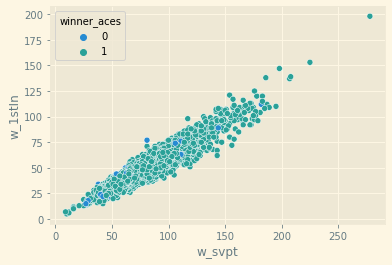

In [32]:
sns.scatterplot(data = atp_2018, x = 'w_svpt', y = 'w_1stIn' , hue = 'winner_aces')
plt.show()

There we have it! Matches without any aces in the serve is undersampled compared to matches with 1 or more, so we are going to oversample matches without any ace to have a balanced dataframe.

In [33]:
# SMOTE sampling strategy
smote = SMOTE(sampling_strategy='not majority', k_neighbors=5)
X_sm, y_sm = smote.fit_resample(X_smote, y_smote)
X_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5544 entries, 0 to 5543
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   w_svpt       5544 non-null   float64
 1   w_1stIn      5544 non-null   float64
 2   winner_aces  5544 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 130.1 KB


In [34]:
Counter(y_sm)

Counter({1: 2772, 0: 2772})

Now we have a balanced dataset!

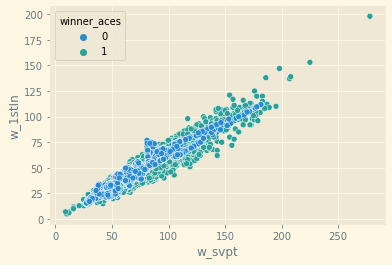

In [35]:
sns.scatterplot(data = X_sm, x = 'w_svpt', y = 'w_1stIn' , hue = 'winner_aces')
plt.show()

## <SPAN style=color:#1F618D>Level 3</SPAN>

### <SPAN style=color:#1F618D>Practice 3</SPAN>

<SPAN style=color:#1F618D>Continue with the sports theme dataset and generate a sample using the **Reservoir sampling method**.</SPAN>

**Reservoir sampling** is a family of randomized algorithms for randomly choosing k samples from a list of n items (stream), where n is either a very large or unknown number. Typically n is large enough that the list doesn’t fit into main memory. 

Following are the steps:  
1. Create an array reservoir[0..k-1] and copy first k items of stream[..] to it. 
2. Now one by one consider all items from (k+1)th item to nth item.  
    a) Generate a random number 'j' from 0 to i where i is the index of the current item in stream[..].  
    b) If j is in range 0 to k-1, replace reservoir[ j ] with stream[ i ]. 

In [36]:
import random

In [37]:
def reservoir_sample(N, k):      
        i = 0
        reservoir = [0]*k
        for x in range(k):
            reservoir[x] = x # Create an array reservoir[0, .., k-1] and copy first k items of N  
    
        while(i < N):
            j = random.randrange(i + 1) # random number between 0 until N                        
            if(j < k):
                reservoir[j] = i # if j < k will change the position obtained j with i            
            i += 1;         
        return reservoir # returns reservoir index    

In [38]:
atp_2018.shape[0]


2889

In [39]:
res_sampl_atp_2018 = atp_2018.iloc[reservoir_sample(atp_2018.shape[0], 351)]
res_sampl_atp_2018

,tourney_id,tourney_name,tourney_date,surface,winner,country_winner,loser,country_loser,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,winner_aces
1519,2018-7650,Antalya,20180625,Grass,"Basilashvili, Nikoloz",RUS,"Lajovic, Dusan",SRB,6-4 2-6 7-5,3,R16,113.0,5.0,4.0,75.0,43.0,30.0,21.0,15.0,3.0,6.0,5.0,3.0,115.0,75.0,45.0,23.0,15.0,12.0,15.0,76.0,722.0,57.0,920.0,1
1716,2018-7163,Istanbul,20180430,Clay,"Dutra Silva, Rogerio",BRA,"Albot, Radu",MDA,6-4 6-4,3,R32,95.0,1.0,1.0,54.0,38.0,30.0,8.0,10.0,0.0,1.0,0.0,3.0,76.0,53.0,34.0,10.0,10.0,2.0,5.0,121.0,452.0,98.0,626.0,1
2384,2018-520,Roland Garros,20180528,Clay,"Monfils, Gael",FRA,"Benchetrit, Elliot",FRA,3-6 6-1 6-2 6-1,5,R128,130.0,1.0,7.0,94.0,49.0,37.0,24.0,16.0,8.0,11.0,1.0,5.0,108.0,54.0,30.0,21.0,15.0,7.0,16.0,37.0,1220.0,306.0,166.0,1
219,2018-M035,Washington,20180730,Hard,"Millot, Vincent",FRA,"Sugita, Yuichi",JPN,6-3 6-2,3,R64,83.0,5.0,1.0,60.0,38.0,30.0,12.0,9.0,3.0,3.0,1.0,1.0,47.0,24.0,16.0,12.0,8.0,2.0,5.0,291.0,174.0,73.0,785.0,1
2634,2018-M-DC-2018-G1-AO-M-IND-CHN-01,Davis Cup G1 R2: IND vs CHN,20180406,Hard,"Ramanathan, Ramkumar",IND,"Wu, Di",CHN,7-6(4) 6-3,3,RR,85.0,11.0,4.0,71.0,41.0,31.0,11.0,11.0,7.0,11.0,1.0,5.0,73.0,44.0,24.0,13.0,10.0,4.0,9.0,132.0,421.0,248.0,204.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,2018-0311,London,20180618,Grass,"Mannarino, Adrian",FRA,"Evans, Daniel",GBR,6-4 0-6 7-5,3,R32,121.0,11.0,5.0,85.0,53.0,33.0,17.0,14.0,2.0,6.0,2.0,2.0,89.0,49.0,36.0,19.0,14.0,6.0,9.0,26.0,1535.0,340.0,138.0,1
444,2018-M007,Miami Masters,20180319,Hard,"Donaldson, Jared",USA,"Baghdatis, Marcos",CYP,6-3 6-4,3,R128,102.0,2.0,6.0,84.0,41.0,33.0,20.0,10.0,8.0,8.0,3.0,4.0,64.0,32.0,22.0,17.0,9.0,3.0,5.0,49.0,1038.0,82.0,670.0,1
2406,2018-0533,Sao Paulo,20180226,Clay,"Kicker, Nicolas",ARG,"Estrella, Victor",DOM,7-6(5) 6-3,3,R32,111.0,2.0,4.0,85.0,41.0,30.0,22.0,11.0,4.0,6.0,2.0,2.0,71.0,44.0,30.0,11.0,10.0,4.0,7.0,96.0,595.0,149.0,357.0,1
349,2018-0495,Dubai,20180226,Hard,"Pouille, Lucas",FRA,"Krajinovic, Filip",SRB,6-3 6-7(4) 7-6(5),3,SF,139.0,16.0,4.0,112.0,56.0,48.0,31.0,17.0,2.0,3.0,6.0,4.0,105.0,66.0,49.0,21.0,16.0,6.0,8.0,15.0,2335.0,34.0,1332.0,1


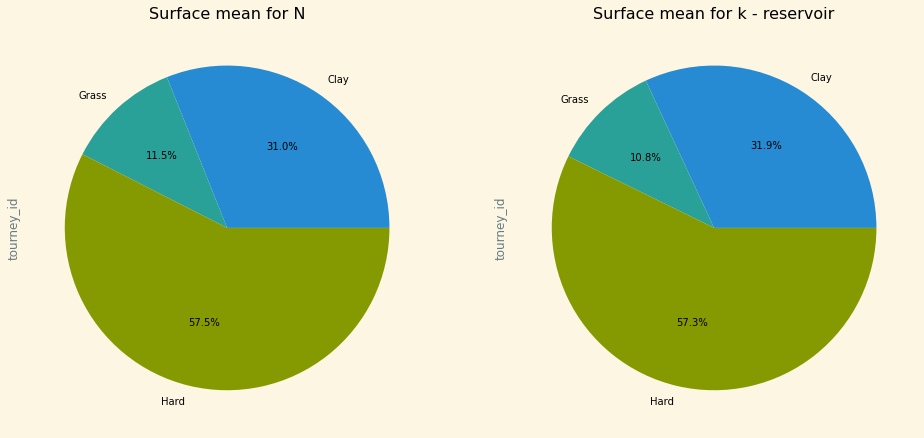

In [40]:
# Prepare data

# Create plot
fig, (ax1, ax2) = plt.subplots(figsize = (16, 8), nrows = 1, ncols = 2) # One figure with 2 subplots
res_sampl_atp_2018.groupby('surface')['tourney_id'].count().plot.pie(subplots=True, autopct='%1.1f%%')
plt.subplot (1,2,1)

atp_2018.groupby('surface')['tourney_id'].count().plot.pie(subplots=True, autopct='%1.1f%%')
plt.subplot (1,2,2)

# Style and customize plot
plt.style.use('Solarize_Light2')
ax1.set_title('Surface mean for N')
ax2.set_title('Surface mean for k - reservoir')

# Show and save plot
plt.show()
# fig.savefig('xxx', dpi = 300, bbox_inches = 'tight')